In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [225]:
# Enter path to cleaned data
df = pd.read_excel('../../Cleaned_data/EIXUZQ_LIB_FOYA.xls', header =[1])

df.head()

,numero,Sex,Age,Pregnant,HealthCareWorker,Occupation,County,District,DateIllnessStarted,CommunityCase,...,County where exposed,District where exposed,ORS,IV fluids,Antibiotic treatment,Antimalarial treatment,Morphine,Diazepam,CT Values,MalariaLab
0,F001,M,40.00,NaN,NaN,NaN,NaN,NaN,NaT,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F002,M,42.00,NaN,NaN,NaN,Lofa,Foya,2014-06-19,N,...,Lofa,Foya,Y,N,Cipro,N,N,N,14.91,MALARIA POS
2,F003,M,7.00,NaN,NaN,NaN,Lofa,Foya,2014-06-19,N,...,Lofa,Foya,Y,N,Cipro/Amox,Coartem,N,N,18.46,MALARIA NEG
3,F004,F,22.00,NaN,NaN,NaN,Lofa,Foya,2014-06-15,N,...,Lofa,Foya,Y,Y,Metro,Coartem,N,N,20.51,MALARIA NEG
4,F005,M,0.25,NaN,NaN,Child,Lofa,Foya,2014-06-19,N,...,Lofa,Foya,Y,N,N,N,N,N,26.30,MALARIA NEG


In [227]:
df["FinalStatus"].value_counts()

Confirmed     453
Not a Case    398
Probable       13
Name: FinalStatus, dtype: int64

In [228]:
df["Age"]

0      40.00
1      42.00
2       7.00
3      22.00
4       0.25
       ...  
866     5.00
867    43.00
868    80.00
869    32.00
870    16.00
Name: Age, Length: 871, dtype: float64

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 83 columns):
 #   Column                                                                    Non-Null Count  Dtype         
---  ------                                                                    --------------  -----         
 0   numero                                                                    871 non-null    object        
 1   Sex                                                                       871 non-null    object        
 2   Age                                                                       858 non-null    float64       
 3   Pregnant                                                                  0 non-null      float64       
 4   HealthCareWorker                                                          43 non-null     object        
 5   Occupation                                                                364 non-null    object        
 6   County    

### Numero

In [230]:
sum(df['Sex'].isna())

0

In [231]:
df['numero'].nunique()

870

One numero has 2 records. 

In [232]:
df['numero'].value_counts()

F716     2
FF019    1
FF025    1
FC155    1
F515     1
        ..
F583     1
F537     1
F447     1
F263     1
FC199    1
Name: numero, Length: 870, dtype: int64

In [233]:
df[df['numero'] == 'F716']

,numero,Sex,Age,Pregnant,HealthCareWorker,Occupation,County,District,DateIllnessStarted,CommunityCase,...,County where exposed,District where exposed,ORS,IV fluids,Antibiotic treatment,Antimalarial treatment,Morphine,Diazepam,CT Values,MalariaLab
828,F716,F,18.0,NaN,NaN,NaN,Lofa,Foya,2014-11-03,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
849,F716,F,37.0,NaN,NaN,NaN,Lofa,Foya,2014-11-25,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
df['Age']

0      40.00
1      42.00
2       7.00
3      22.00
4       0.25
       ...  
866     5.00
867    43.00
868    80.00
869    32.00
870    16.00
Name: Age, Length: 871, dtype: float64

In [235]:
df.loc[849, 'numero'] = 'F716_bis'

### Sex

In [236]:
sum(df['Sex'].isna())

0

In [237]:
df['Sex'].value_counts()

F    434
M    433
m      3
f      1
Name: Sex, dtype: int64

In [238]:
dict_sex = {'m' : 'M', 'f' : 'F'}

def correct_sex(row):
    if row.Sex in dict_sex:
            return dict_sex[row.Sex]
    return row.Sex

df['Sex'] = df.apply(correct_sex,axis = 1)

In [239]:
df['Sex'].value_counts()

M    436
F    435
Name: Sex, dtype: int64

### Age

In [240]:
sum(df['Age'].isna())

13

In [241]:
df['Age']

0      40.00
1      42.00
2       7.00
3      22.00
4       0.25
       ...  
866     5.00
867    43.00
868    80.00
869    32.00
870    16.00
Name: Age, Length: 871, dtype: float64

In [242]:
df['Age'].mean()

31.06493395493395

In [243]:
df['Age'].median()

30.0

In [244]:
df['Age'].min()

0.0

In [245]:
df['Age'].max()

114.0

In [246]:
df['Age'].value_counts()

40.0    47
35.0    43
30.0    40
25.0    30
45.0    28
        ..
67.0     1
13.0     1
0.0      1
83.0     1
96.0     1
Name: Age, Length: 101, dtype: int64

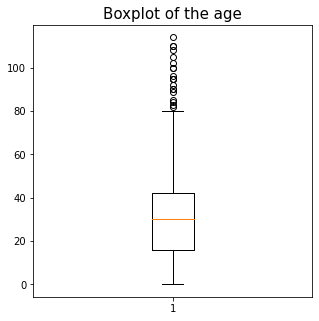

In [247]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_title("Boxplot of the age",size=15)
plt.boxplot(df.loc[~df['Age'].isna(),'Age'])
plt.show()

### Pregnant

In [248]:
sum(~df['Pregnant'].isna())

0

In [249]:
df.drop(columns= ['Pregnant'], inplace = True)

### HealthCareWorker

In [250]:
df['HealthCareWorker'].value_counts()

Y    29
N    14
Name: HealthCareWorker, dtype: int64

### Occupation

In [251]:
sum(df['Occupation'].isna())

507

In [252]:
df['Occupation'] = df['Occupation'] .str.lower()
df['Occupation'].value_counts().head()

farmer        112
child          86
student        75
house wife      8
housewife       6
Name: Occupation, dtype: int64

### County

In [253]:
sum(df['County'].isna())

25

In [254]:
df['County'] = df['County'].str.lower()
df['County'].value_counts()

lofa            781
sierra leone     34
bong             18
montserrado       9
nimba             2
grand gedeh       1
guinea            1
Name: County, dtype: int64

### DateIllnessStarted

In [255]:
sum(df['DateIllnessStarted'].isna())

183

In [256]:
df['DateIllnessStarted_day'] = df['DateIllnessStarted'].dt.to_period('D')
df['DateIllnessStarted_month'] = df['DateIllnessStarted'].dt.to_period('M')

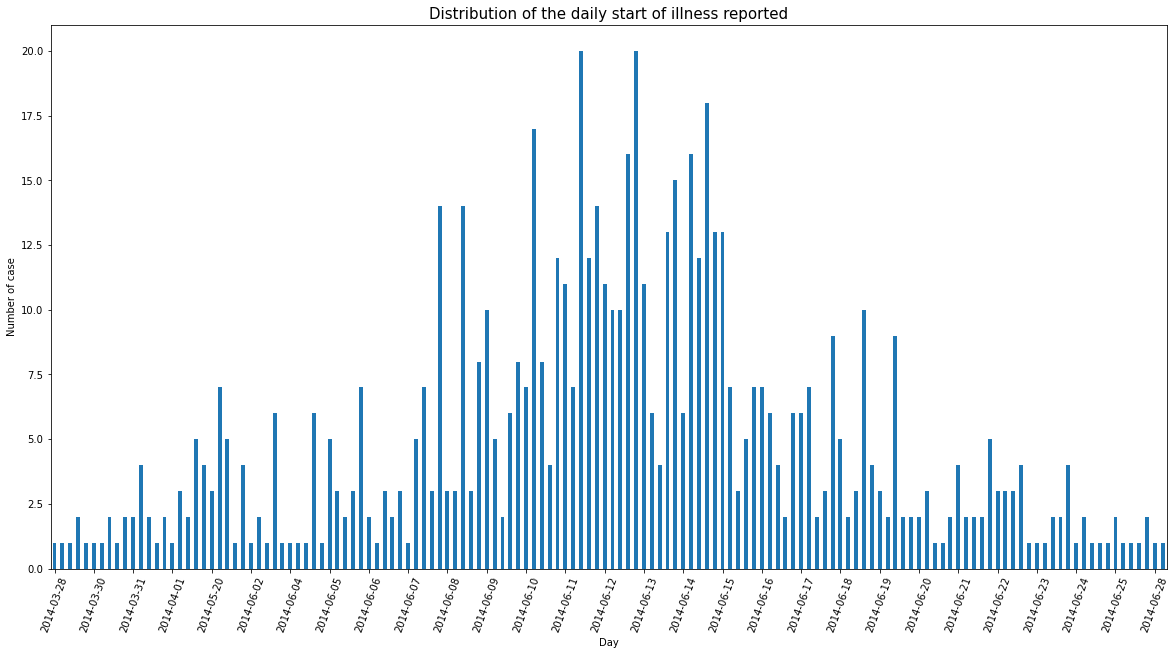

In [257]:
fig, ax = plt.subplots(figsize=(20,10))

df['DateIllnessStarted_day'].value_counts().sort_index().plot(kind ="bar")

ax.set_title("Distribution of the daily start of illness reported",size=15)
ax.set_xlabel('Day')
ax.set_ylabel('Number of case')
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
plt.xticks(rotation=70)
plt.show()

### DateofCaseReport

In [258]:
sum(df['dateofCaseReport'].isna())

0

In [259]:
df['dateofCaseReport_day'] = df['dateofCaseReport'].dt.to_period('D')
df['dateofCaseReport_month'] = df['dateofCaseReport'].dt.to_period('M')

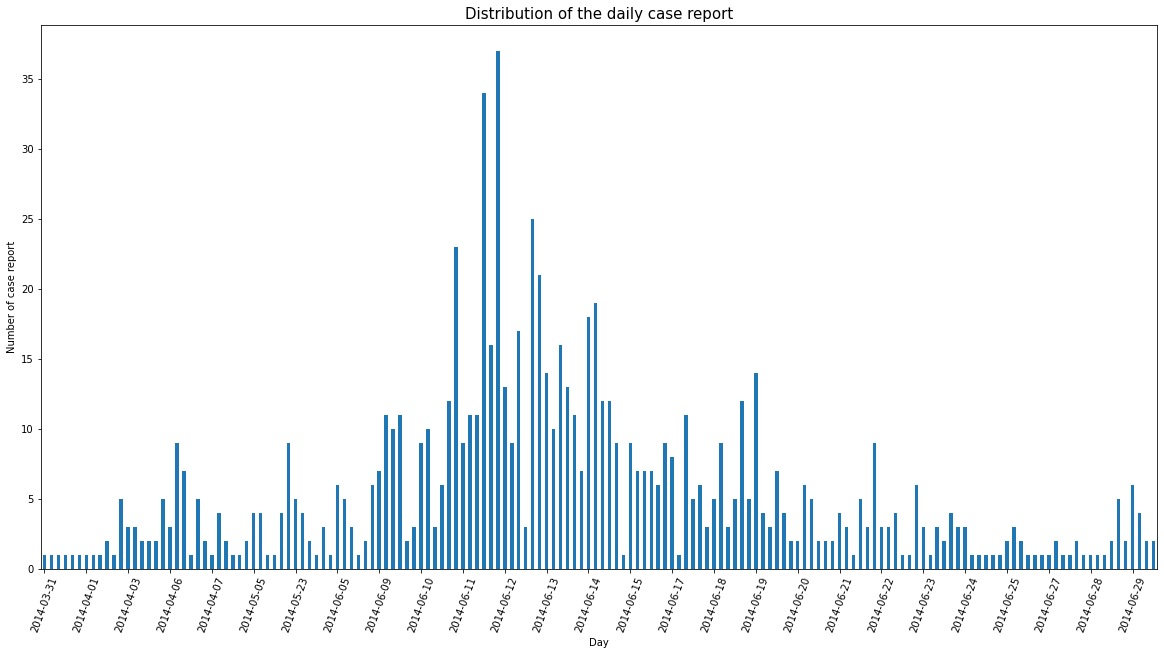

In [260]:
fig, ax = plt.subplots(figsize=(20,10))

df['dateofCaseReport_day'].value_counts().sort_index().plot(kind ="bar")

ax.set_title("Distribution of the daily case report",size=15)
ax.set_xlabel('Day')
ax.set_ylabel('Number of case report')
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
plt.xticks(rotation=70)
plt.show()

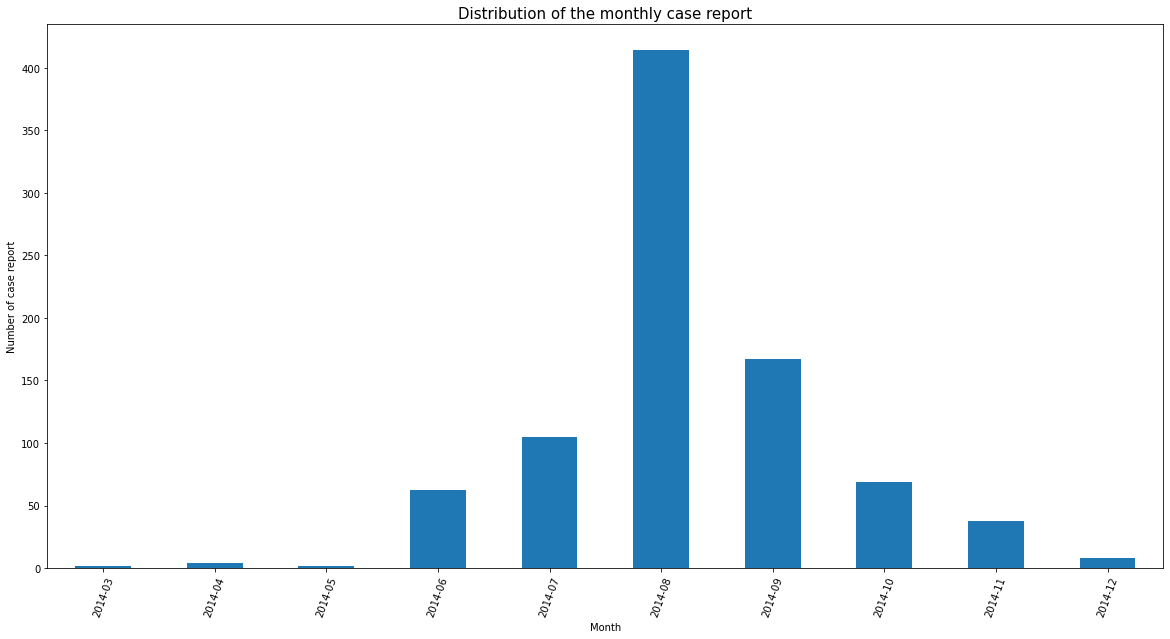

In [261]:
fig, ax = plt.subplots(figsize=(20,10))

df['dateofCaseReport_month'].value_counts().sort_index().plot(kind ="bar")

ax.set_title("Distribution of the monthly case report",size=15)
ax.set_xlabel('Month')
ax.set_ylabel('Number of case report')
#ax.xaxis.set_major_locator(plt.MaxNLocator(30))
plt.xticks(rotation=70)
plt.show()

### Time between start of sickness and report

In [262]:
def compute_diff_days(row):
    if pd.isnull(row.DateIllnessStarted):
        return np.nan
    else: 
        return (row.dateofCaseReport - row.DateIllnessStarted)

In [263]:
df['Referraltime'] = df[['DateIllnessStarted','dateofCaseReport']].apply(compute_diff_days, axis = 1 )

In [264]:
df['Referraltime'] 

0        NaT
1     1 days
2     1 days
3     5 days
4     1 days
       ...  
866      NaT
867      NaT
868      NaT
869      NaT
870      NaT
Name: Referraltime, Length: 871, dtype: timedelta64[ns]

In [265]:
sum(df['Referraltime'].isna())

183

In [266]:
df['Referraltime'] .value_counts()

3 days      127
2 days      102
1 days       86
4 days       78
7 days       67
5 days       61
0 days       53
6 days       43
8 days       22
14 days       7
9 days        7
13 days       6
10 days       6
11 days       4
12 days       4
16 days       3
18 days       2
17 days       2
21 days       1
24 days       1
127 days      1
-29 days      1
95 days       1
31 days       1
22 days       1
19 days       1
Name: Referraltime, dtype: int64

In [267]:
df[df['Referraltime'] == '-29 days']

,numero,Sex,Age,HealthCareWorker,Occupation,County,District,DateIllnessStarted,CommunityCase,dateofCaseReport,...,Antimalarial treatment,Morphine,Diazepam,CT Values,MalariaLab,DateIllnessStarted_day,DateIllnessStarted_month,dateofCaseReport_day,dateofCaseReport_month,Referraltime
762,FF033,F,64.0,NaN,NaN,lofa,Voinjama,2014-08-17,Y,2014-07-19,...,NaN,NaN,NaN,24.05,0,2014-08-17,2014-08,2014-07-19,2014-07,-29 days


We have an odd value and we decide to drop it. 

In [268]:
df.drop(index = 762, inplace = True)

In [269]:
df_dif_status = df.groupby(['Referraltime','FinalStatus']).numero.count().unstack(fill_value=0)
df_dif_status.head()

FinalStatus,Confirmed,Not a Case,Probable
Referraltime,,,
0 days,33,18,1
1 days,40,45,1
2 days,63,38,1
3 days,78,48,1
4 days,55,20,3


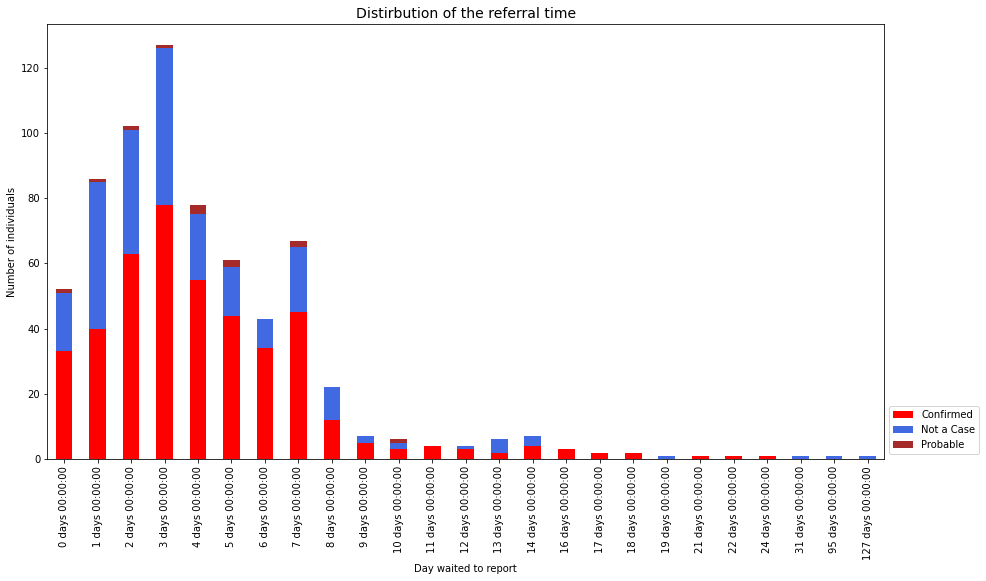

In [270]:
fig, ax = plt.subplots(figsize=(15,8))

df_dif_status.plot(kind='bar',stacked=True, ax=ax, color = ['red', 'royalblue', 'brown'])

plt.legend(loc="lower left", bbox_to_anchor=(1,0))
ax.set_title("Distirbution of the referral time",size=14)
ax.set_xlabel('Day waited to report')
ax.set_ylabel('Number of individuals')
plt.show()

In [271]:
df_dif_exit = df.groupby(['Referraltime','TypeOfExit']).numero.count().unstack(fill_value=0)
df_dif_exit.head()

TypeOfExit,Cured,Died,Sent Home,Sent home,Transferred,died
Referraltime,,,,,,
0 days,9,25,10,5,0,0
1 days,14,28,29,11,2,1
2 days,19,51,22,7,0,0
3 days,26,54,35,10,0,0
4 days,23,37,12,4,1,0


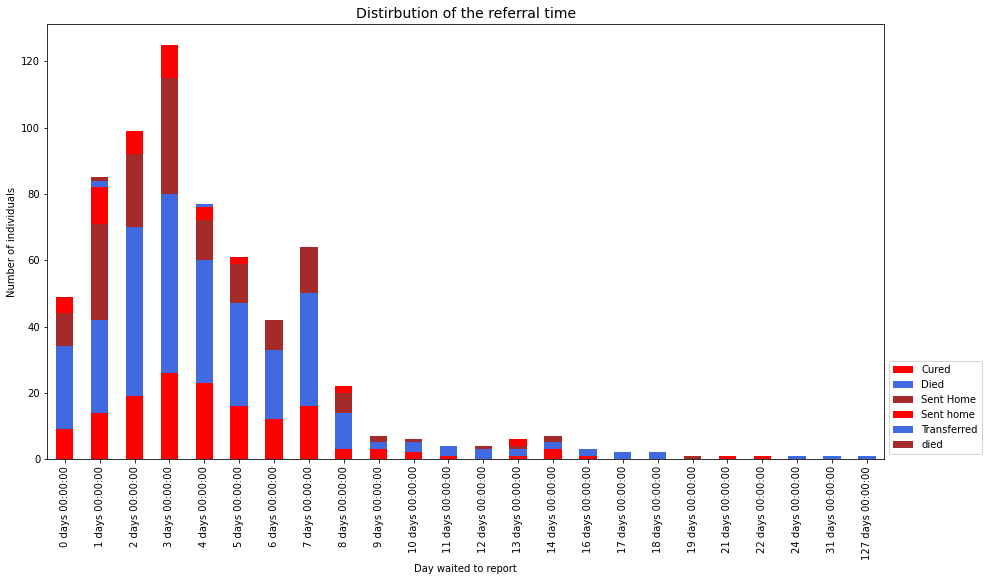

In [272]:
fig, ax = plt.subplots(figsize=(15,8))

df_dif_exit.plot(kind='bar',stacked=True, ax=ax, color = ['red', 'royalblue', 'brown'])

plt.legend(loc="lower left", bbox_to_anchor=(1,0))
ax.set_title("Distirbution of the referral time",size=14)
ax.set_xlabel('Day waited to report')
ax.set_ylabel('Number of individuals')
plt.show()

### readmission

In [273]:
df['readmission'].value_counts()

Y     12
N      5
       1
Name: readmission, dtype: int64

### DelayBeforeAdmission

In [274]:
df_delay_case = df.groupby(['DelayBeforeAdmission','FinalStatus']).numero.count().unstack(fill_value=0)
df_delay_case.head()

FinalStatus,Confirmed,Not a Case,Probable
DelayBeforeAdmission,,,
0.0,26,18,1
1.0,36,40,1
2.0,56,35,0
3.0,71,48,1
4.0,53,20,3


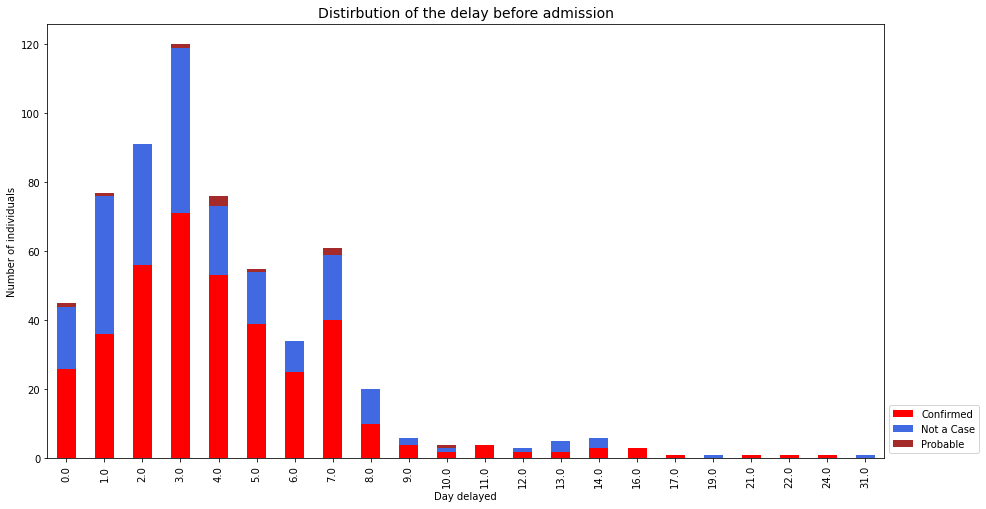

In [275]:
fig, ax = plt.subplots(figsize=(15,8))

df_delay_case.plot(kind='bar',stacked=True, ax=ax, color = ['red', 'royalblue', 'brown'])

plt.legend(loc="lower left", bbox_to_anchor=(1,0))
ax.set_title("Distirbution of the delay before admission",size=14)
ax.set_xlabel('Day delayed')
ax.set_ylabel('Number of individuals')
plt.show()

In [276]:
df['TypeOfExit'] = df['TypeOfExit'].str.lower()

In [277]:
df_delay_exit = df.groupby(['DelayBeforeAdmission','TypeOfExit']).numero.count().unstack(fill_value=0)
df_delay_exit.head()

TypeOfExit,cured,died,sent home,transferred
DelayBeforeAdmission,,,,
0.0,10,17,15,0
1.0,14,23,38,1
2.0,18,39,31,0
3.0,26,46,45,0
4.0,24,34,16,1


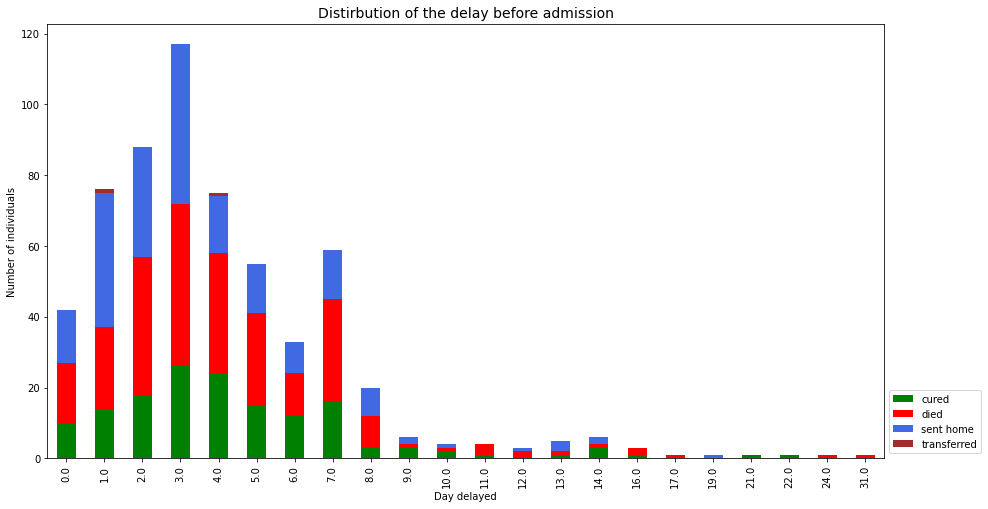

In [278]:
fig, ax = plt.subplots(figsize=(15,8))

df_delay_exit.plot(kind='bar',stacked=True, ax=ax, color = ['green', 'red','royalblue', 'brown'])

plt.legend(loc="lower left", bbox_to_anchor=(1,0))
ax.set_title("Distirbution of the delay before admission",size=14)
ax.set_xlabel('Day delayed')
ax.set_ylabel('Number of individuals')
plt.show()

In [279]:
df_delay_exit['Mortality rate'] = df_delay_exit.apply(lambda row : row['died'] / sum(row), axis = 1)

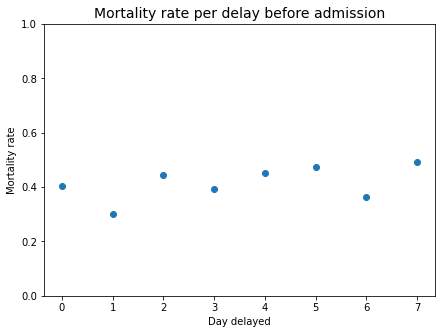

In [280]:
fig, ax = plt.subplots(figsize=(7,5))

delay_mr = df_delay_exit.loc[:7,'Mortality rate']

plt.scatter(delay_mr.index, delay_mr)
ax.set_title("Mortality rate per delay before admission",size=14)
ax.set_xlabel('Day delayed')
ax.set_ylabel('Mortality rate')
ax.set_ylim(0, 1) 
plt.show()

### TypeOfExit

In [281]:
sum(df['TypeOfExit'].isna())

28

In [282]:
df.loc[df['TypeOfExit'].isna(), 'FinalStatus'].value_counts()

Not a Case    24
Confirmed      3
Name: FinalStatus, dtype: int64

In [283]:
df['TypeOfExit'] = df['TypeOfExit'].fillna('unknown')

In [284]:
df['TypeOfExit'].value_counts()

died           427
sent home      257
cured          154
unknown         28
transferred      3
escaped          1
Name: TypeOfExit, dtype: int64

### FinalStatus

In [285]:
df['FinalStatus'].value_counts()

Confirmed     452
Not a Case    398
Probable       13
Name: FinalStatus, dtype: int64

In [286]:
pd.DataFrame(df.groupby(['FinalStatus','TypeOfExit']).numero.count())

numero
FinalStatus TypeOfExit         
Confirmed   cured           153
            died            296
            unknown           3
Not a Case  cured             1
            died            113
            sent home       257
            transferred       3
            unknown          24
Probable    died             13

### LenghtOfStay 

In [287]:
sum(df['LenghtOfStay'].isna())

214

In [288]:
df_lstay_case = df.groupby(['LenghtOfStay','FinalStatus']).numero.count().unstack(fill_value=0)
df_lstay_case.head()

FinalStatus,Confirmed,Not a Case,Probable
LenghtOfStay,,,
0.0,5,4,4
1.0,32,15,0
2.0,29,48,3
3.0,36,50,2
4.0,29,44,1


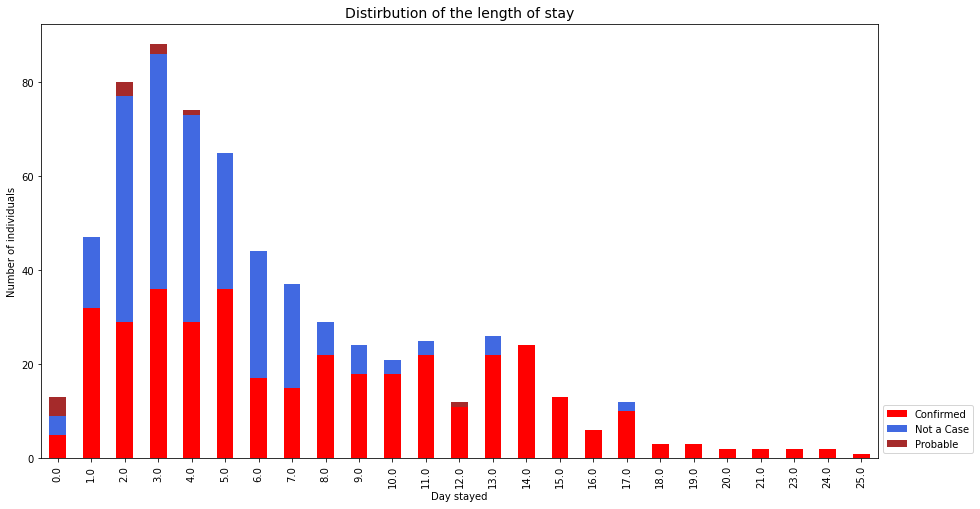

In [289]:
fig, ax = plt.subplots(figsize=(15,8))

df_lstay_case.plot(kind='bar',stacked=True, ax=ax, color = ['red', 'royalblue', 'brown'])

plt.legend(loc="lower left", bbox_to_anchor=(1,0))
ax.set_title("Distirbution of the length of stay",size=14)
ax.set_xlabel('Day stayed')
ax.set_ylabel('Number of individuals')
plt.show()

In [290]:
df_lstay_exit = df.groupby(['LenghtOfStay','TypeOfExit']).numero.count().unstack(fill_value=0)
df_lstay_exit.head()

TypeOfExit,died,escaped,sent home,cured,transferred
LenghtOfStay,,,,,
0.0,13,1,0,0,0
1.0,35,0,12,0,0
2.0,34,0,46,0,0
3.0,39,0,49,0,0
4.0,30,0,41,2,1


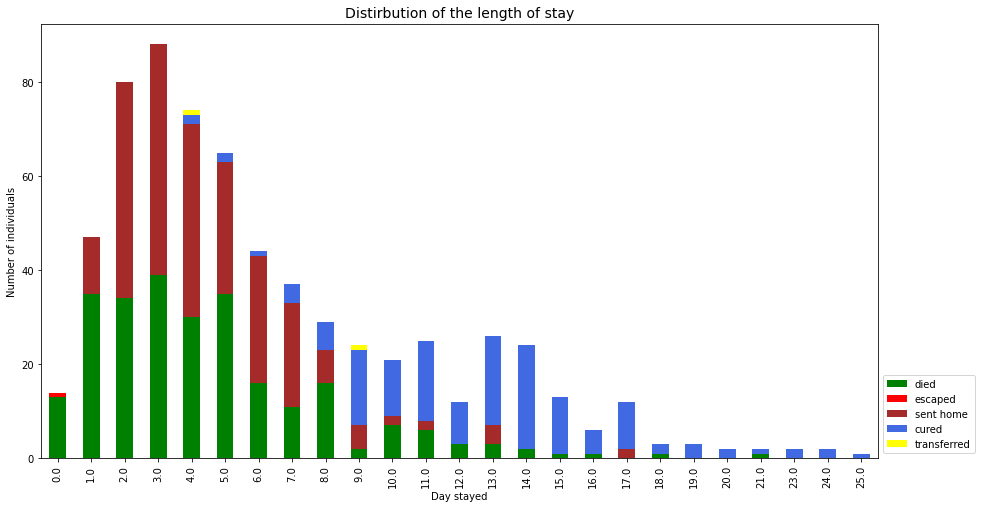

In [291]:
fig, ax = plt.subplots(figsize=(15,8))

df_lstay_exit.plot(kind='bar',stacked=True, ax=ax, color = ['green', 'red', 'brown', 'royalblue', 'yellow'])

plt.legend(loc="lower left", bbox_to_anchor=(1,0))
ax.set_title("Distirbution of the length of stay",size=14)
ax.set_xlabel('Day stayed')
ax.set_ylabel('Number of individuals')
plt.show()

### Test Result

At maximum 3 tests have been made.

In [292]:
df['First'].value_counts()

P    439
N    402
I      6
Name: First, dtype: int64

In [293]:
dict_result = {'P' : 'Positive', 'N' : 'Negative', 'I' : 'Inconclusive', np.nan : 'Not done'}

In [294]:
df['First'] = df['First'].apply(lambda x: dict_result[x])
df['Second'] = df['Second'].apply(lambda x: dict_result[x])
df['Third'] = df['Third'].apply(lambda x: dict_result[x])

In [295]:
df_tests_outcome = pd.DataFrame(df.groupby(['First','Second','Third', 'TypeOfExit','FinalStatus']).numero.count())
df_tests_outcome

numero
First        Second       Third    TypeOfExit  FinalStatus        
Inconclusive Inconclusive Not done died        Not a Case        1
                          Positive died        Confirmed         1
             Negative     Not done died        Not a Case        1
Negative     Negative     Negative sent home   Not a Case        6
                          Not done cured       Not a Case        1
                                   died        Not a Case        3
                                   sent home   Not a Case       81
                                   transferred Not a Case        1
                                   unknown     Not a Case        1
             Not done     Not done died        Not a Case      108
                                   sent home   Not a Case      166
                                   transferred Not a Case        2
                                   unknown     Not a Case       23
             Positive     Negative cured       Confirmed         1
                          Not done cured       Confirmed         2
                                   died        Confirmed         7
Not done     Not done     Not done cured       Confirmed         2
                                   died        Probable         13
                                   sent home   Not a Case        4
Positive     Inconclusive Negative died        Confirmed         1
             Negative     Negative cured       Confirmed         1
                          Not done cured       Confirmed        82
                                   died        Confirmed         2
             Not done     Not done cured       Confirmed        40
                                   died        Confirmed       283
                                   unknown     Confirmed         3
             Positive     Negative cured       Confirmed        23
                          Not done cured       Confirmed         2
                                   died        Confirmed         2

### MalariaTest

In [296]:
df['MalariaTest'] = df['MalariaTest'].str.lower()
df['MalariaTest'].value_counts()

negative        459
not done        146
positive        141
n/a              90
no info          12
inconclusive      2
postive           1
Name: MalariaTest, dtype: int64

In [297]:
dict_malaria = {'negative' : 'Negative', 'not done' : 'Unknown', 'positive' : 'Positive', 
                'n/a' : 'Unknown', 'no info' : 'Unknown', 'inconclusive' : 'Unknown', 
                'postive' : 'Positive', np.nan : 'Unknown'}

df['MalariaTest'] = df['MalariaTest'].apply(lambda x: dict_malaria[x])
df['MalariaTest'].value_counts()

Negative    459
Unknown     269
Positive    142
Name: MalariaTest, dtype: int64

In [298]:
pd.DataFrame(df.groupby(['MalariaTest', 'FinalStatus']).numero.count())

numero
MalariaTest FinalStatus        
Negative    Confirmed       276
            Not a Case      182
            Probable          1
Positive    Confirmed        65
            Not a Case       77
Unknown     Confirmed       111
            Not a Case      139
            Probable         12

### TypeOfExit 

In [299]:
df['TypeOfExit'].value_counts()

died           427
sent home      257
cured          154
unknown         28
transferred      3
escaped          1
Name: TypeOfExit, dtype: int64

### Contact

In [300]:
contacts = ['Someone ill in the familiy','Visited someone ill','somebody recently died in your family','been to a funeral recently']

In [301]:
df.loc[:,contacts]=df.loc[:,contacts].fillna('N')

In [302]:
df['Someone ill in the familiy'].value_counts()

N    724
Y    146
Name: Someone ill in the familiy, dtype: int64

In [303]:
df['Visited someone ill'].value_counts()

N    851
Y     19
Name: Visited someone ill, dtype: int64

In [304]:
df['somebody recently died in your family'].value_counts()

N    733
Y    137
Name: somebody recently died in your family, dtype: int64

In [305]:
df['been to a funeral recently'].value_counts()

N    851
Y     19
Name: been to a funeral recently, dtype: int64

In [306]:
df.loc[:,contacts]=df.loc[:,contacts].applymap(lambda x: 1 if x == 'Y' else 0)

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 0 to 870
Data columns (total 87 columns):
 #   Column                                                                    Non-Null Count  Dtype          
---  ------                                                                    --------------  -----          
 0   numero                                                                    870 non-null    object         
 1   Sex                                                                       870 non-null    object         
 2   Age                                                                       857 non-null    float64        
 3   HealthCareWorker                                                          43 non-null     object         
 4   Occupation                                                                364 non-null    object         
 5   County                                                                    845 non-null    object         
 6   Di

### Details of type of contact with FHF patient

details_contact = ['Yes/No', 'Slept in the same house', 'Had direct physical contact', 'Touched their body fluids', 'had sexual relations',  
'Handled clothes or other personal objetc']              


### Symptoms since illness started

In [308]:
symptoms = ['fever', 'Vomit', 'Nausea', 'Diarrhoea', 'AstheniaWeakness', 'LossOfAppetite', 'AbdominalPain', 'ChestPain', 
'BoneMusclePain', 'JointPain','Headache', 'Cough', 'Breathlessness', 'SwallowingProblem',
'Sorethroat', 'Jaundice', 'Conjunctivitis', 'HemoragicEyes','SkinRash', 'Hichups', 'PainEyesSensitivityLight',
'Coma', 'ConfusedDisoriented', 'OtherHaemorraghe']

infos = ['Sex', 'Age', 'Referraltime']
tests = ['CT Values', 'MalariaTest']
outputs = ['FinalStatus', 'TypeOfExit']

In [309]:
df_ml = df[infos+ symptoms + tests + outputs].copy()
df_ml.head()

,Sex,Age,Referraltime,fever,Vomit,Nausea,Diarrhoea,AstheniaWeakness,LossOfAppetite,AbdominalPain,...,SkinRash,Hichups,PainEyesSensitivityLight,Coma,ConfusedDisoriented,OtherHaemorraghe,CT Values,MalariaTest,FinalStatus,TypeOfExit
0,M,40.00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Probable,died
1,M,42.00,1 days,NaN,NaN,NaN,NaN,Y,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.91,Positive,Confirmed,died
2,M,7.00,1 days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.46,Negative,Confirmed,died
3,F,22.00,5 days,Y,Y,Y,Y,NaN,NaN,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,20.51,Negative,Confirmed,died
4,M,0.25,1 days,Y,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,26.30,Negative,Confirmed,died


We drop the row that have only Nan values in the symptoms.

In [310]:
df_ml.dropna(how='all', subset = symptoms, inplace = True) 
df_ml[symptoms] = df_ml[symptoms].fillna('N')
dict_binary_symptoms = {'Y' : 1, 'N' : 0}
df_ml[symptoms] = df_ml[symptoms].applymap(lambda x: int(dict_binary_symptoms[x]))
df_ml.head()

,Sex,Age,Referraltime,fever,Vomit,Nausea,Diarrhoea,AstheniaWeakness,LossOfAppetite,AbdominalPain,...,SkinRash,Hichups,PainEyesSensitivityLight,Coma,ConfusedDisoriented,OtherHaemorraghe,CT Values,MalariaTest,FinalStatus,TypeOfExit
1,M,42.00,1 days,0,0,0,0,1,0,0,...,0,0,0,0,0,0,14.91,Positive,Confirmed,died
2,M,7.00,1 days,0,0,0,0,0,0,0,...,0,0,0,0,0,0,18.46,Negative,Confirmed,died
3,F,22.00,5 days,1,1,1,1,0,0,1,...,0,0,0,0,0,0,20.51,Negative,Confirmed,died
4,M,0.25,1 days,1,0,0,0,0,0,0,...,0,0,0,0,0,0,26.30,Negative,Confirmed,died
5,M,8.00,4 days,1,0,0,0,0,1,0,...,0,0,0,0,0,0,NaN,Positive,Not a Case,sent home


In [311]:
df_ml[symptoms+outputs].groupby(outputs).sum()

fever  Vomit  Nausea  Diarrhoea  AstheniaWeakness  \
FinalStatus TypeOfExit                                                       
Confirmed   cured           90     70      45         72                87   
            died           135    123      76        118               128   
            unknown          1      1       1          1                 1   
Not a Case  died             6      5       5          1                 7   
            sent home      129     70      30         63               110   
            transferred      2      1       1          1                 1   
            unknown          6      3       2          3                 2   
Probable    died             3      2       0          3                 1   

                         LossOfAppetite  AbdominalPain  ChestPain  \
FinalStatus TypeOfExit                                              
Confirmed   cured                    52             42         29   
            died                     81             64         43   
            unknown                   1              1          1   
Not a Case  died                      5              3          4   
            sent home                59             70         41   
            transferred               0              1          0   
            unknown                   0              3          1   
Probable    died                      1              3          0   

                         BoneMusclePain  JointPain  ...  Sorethroat  Jaundice  \
FinalStatus TypeOfExit                              ...                         
Confirmed   cured                    37         22  ...          16         5   
            died                     68         37  ...          32         4   
            unknown                   1          1  ...           0         0   
Not a Case  died                      2          2  ...           2         0   
            sent home                61         54  ...          18        13   
            transferred               1          1  ...           0         0   
            unknown                   2          2  ...           1         0   
Probable    died                      0          0  ...           0         1   

                         Conjunctivitis  HemoragicEyes  SkinRash  Hichups  \
FinalStatus TypeOfExit                                                      
Confirmed   cured                    11              0         3        5   
            died                     25              1         1       12   
            unknown                   1              0         0        0   
Not a Case  died                      0              0         0        1   
            sent home                 5              0         3        7   
            transferred               0              0         0        1   
            unknown                   0              0         0        0   
Probable    died                      0              0         0        2   

                         PainEyesSensitivityLight  Coma  ConfusedDisoriented  \
FinalStatus TypeOfExit                                                         
Confirmed   cured                               4     0                    4   
            died                                5     1                    7   
            unknown                             0     0                    0   
Not a Case  died                                0     0                    1   
            sent home                           1     0                    0   
            transferred                         0     0                    0   
            unknown                             0     0                    0   
Probable    died                                0     0                    1   

                         OtherHaemorraghe  
FinalStatus TypeOfExit                     
Confirmed   cured                       4  
            died                      

# ML models

In [312]:
df_ml['Sex'] = df_ml['Sex'].apply(lambda x: 1 if x == 'M' else 0)

In [313]:
df_ml['Referraltime'] = df_ml['Referraltime'].apply(lambda x: x.days)

In [314]:
df_ml

,Sex,Age,Referraltime,fever,Vomit,Nausea,Diarrhoea,AstheniaWeakness,LossOfAppetite,AbdominalPain,...,SkinRash,Hichups,PainEyesSensitivityLight,Coma,ConfusedDisoriented,OtherHaemorraghe,CT Values,MalariaTest,FinalStatus,TypeOfExit
1,1,42.00,1.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,14.91,Positive,Confirmed,died
2,1,7.00,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,18.46,Negative,Confirmed,died
3,0,22.00,5.0,1,1,1,1,0,0,1,...,0,0,0,0,0,0,20.51,Negative,Confirmed,died
4,1,0.25,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,26.30,Negative,Confirmed,died
5,1,8.00,4.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,NaN,Positive,Not a Case,sent home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,0,30.00,2.0,1,0,0,0,1,1,0,...,0,0,0,0,0,1,16.24,Negative,Confirmed,died
822,0,25.00,2.0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,17.11,Negative,Confirmed,died
823,1,46.00,0.0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,18.54,Negative,Confirmed,unknown
824,1,43.00,2.0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,NaN,Negative,Not a Case,unknown


**Setting 1 Triage :** Using only the personnal informations and the symptoms. We want to find out if the patient has Ebola (FinalStatus)

In [315]:
from sklearn.preprocessing import StandardScaler

#select the features needed
df_triage = df_ml[infos+ symptoms+ ['FinalStatus']]
df_triage = df_triage[(df_triage['FinalStatus'] != 'Probable') & ~(df_triage['FinalStatus'].isna())]

#transform the dependent variable
dict_fstatus = {'Confirmed' : 1, 'Not a Case' : 0}
df_triage['FinalStatus'] = df_triage['FinalStatus'].apply(lambda x : dict_fstatus[x]) 

In [316]:
df_triage.apply(lambda x: sum(x.isna()),axis=0)

Sex                          0
Age                          3
Referraltime                26
fever                        0
Vomit                        0
Nausea                       0
Diarrhoea                    0
AstheniaWeakness             0
LossOfAppetite               0
AbdominalPain                0
ChestPain                    0
BoneMusclePain               0
JointPain                    0
Headache                     0
Cough                        0
Breathlessness               0
SwallowingProblem            0
Sorethroat                   0
Jaundice                     0
Conjunctivitis               0
HemoragicEyes                0
SkinRash                     0
Hichups                      0
PainEyesSensitivityLight     0
Coma                         0
ConfusedDisoriented          0
OtherHaemorraghe             0
FinalStatus                  0
dtype: int64

In [317]:
df_triage.dropna(how='any',inplace= True)

#normalize the continuous variables
scaler = StandardScaler()
df_triage[['Age','Referraltime']] = scaler.fit_transform(df_triage[['Age','Referraltime']])
df_triage.head()

,Sex,Age,Referraltime,fever,Vomit,Nausea,Diarrhoea,AstheniaWeakness,LossOfAppetite,AbdominalPain,...,Jaundice,Conjunctivitis,HemoragicEyes,SkinRash,Hichups,PainEyesSensitivityLight,Coma,ConfusedDisoriented,OtherHaemorraghe,FinalStatus
1,1,0.783286,-0.595746,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,-1.227179,-0.595746,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,-0.365551,0.130699,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1,-1.614912,-0.595746,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,-1.169737,-0.050912,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [318]:
import statsmodels.api as sm

X = sm.add_constant(df_triage.loc[:, df_triage.columns != 'FinalStatus'])
y = df_triage['FinalStatus']

est_OLS = sm.OLS(y, X.astype(float)).fit()
print(est_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:            FinalStatus   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     3.993
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           3.39e-10
Time:                        13:25:27   Log-Likelihood:                -277.81
No. Observations:                 478   AIC:                             611.6
Df Residuals:                     450   BIC:                             728.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [319]:
est_logit = sm.Logit(y, X.astype(float)).fit()
print(est_logit.summary())

         Current function value: 0.546278
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            FinalStatus   No. Observations:                  478
Model:                          Logit   Df Residuals:                      450
Method:                           MLE   Df Model:                           27
Date:                Sat, 21 Nov 2020   Pseudo R-squ.:                  0.1683
Time:                        13:25:27   Log-Likelihood:                -261.12
converged:                      False   LL-Null:                       -313.98
Covariance Type:            nonrobust   LLR p-value:                 2.917e-11
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.1280      0.309     -0.415      0.678      -0.733       0.477
Sex                    

/home/lavinia/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


We need to do some feature selection.

#### Backward Elimination

We feed all the possible features to the model at first. We check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.

In [320]:
X = df_triage.loc[:, df_triage.columns != 'FinalStatus']
y = df_triage['FinalStatus']

#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Vomit', 'Diarrhoea', 'AstheniaWeakness', 'AbdominalPain', 'JointPain', 'SwallowingProblem', 'Jaundice', 'Conjunctivitis']


In [321]:
X = sm.add_constant(df_triage.loc[:, selected_features_BE])
y = df_triage['FinalStatus']

est_OLS = sm.OLS(y, X.astype(float)).fit()
print(est_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:            FinalStatus   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     12.22
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           6.30e-16
Time:                        13:25:27   Log-Likelihood:                -283.90
No. Observations:                 478   AIC:                             585.8
Df Residuals:                     469   BIC:                             623.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4457      0.04

In [322]:
X = df_triage.loc[:, df_triage.columns != 'FinalStatus']
y = df_triage['FinalStatus']

#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.Logit(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

         Current function value: 0.546278
         Iterations: 35


/home/lavinia/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.547038
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.548212
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.548214
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.548225
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.548257
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.548329
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.548439
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.548568
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.548871
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.549194
         Iterations 7
Optimization ter

/home/lavinia/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [323]:
X = sm.add_constant(df_triage.loc[:, selected_features_BE])
y = df_triage['FinalStatus']

est_Logit = sm.Logit(y, X.astype(float)).fit()
print(est_Logit.summary())

Optimization terminated successfully.
         Current function value: 0.566194
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            FinalStatus   No. Observations:                  478
Model:                          Logit   Df Residuals:                      470
Method:                           MLE   Df Model:                            7
Date:                Sat, 21 Nov 2020   Pseudo R-squ.:                  0.1380
Time:                        13:25:27   Log-Likelihood:                -270.64
converged:                       True   LL-Null:                       -313.98
Covariance Type:            nonrobust   LLR p-value:                 5.966e-16
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0473      0.175     -0.270      0.788      -0.391       0.296
Vomit   

#### Recursive Feature Elimination
The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain. It uses accuracy metric to rank the feature according to their importance. The RFE method takes the model to be used and the number of required features as input. It then gives the ranking of all the variables, 1 being most important. It also gives its support, True being relevant feature and False being irrelevant feature.

In [324]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X = df_triage.loc[:, df_triage.columns != 'FinalStatus']
y = df_triage['FinalStatus']

#no of features 
nof_list=np.arange(1, len(X.columns)+1) 

highest_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    #mean accuracy
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>highest_score):
        highest_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, highest_score))

Optimum number of features: 12
Score with 12 features: 0.146627


In [325]:
from sklearn.linear_model import LogisticRegression

X = df_triage.loc[:, df_triage.columns != 'FinalStatus']
y = df_triage['FinalStatus']

#no of features 
nof_list=np.arange(1, len(X.columns)+1)   

highest_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LogisticRegression()
    rfe = RFE(model,n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>highest_score):
        highest_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, highest_score))

Optimum number of features: 11
Score with 11 features: 0.652778


In [327]:
cols = np.array(X.columns)
model = LinearRegression()

#Initializing RFE model
rfe = RFE(model, n_features_to_select=11)   

#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  

#Fitting the data to model
model.fit(X_rfe,y) 

print(cols[rfe.support_])

['Vomit' 'Diarrhoea' 'AbdominalPain' 'JointPain' 'SwallowingProblem'
 'Jaundice' 'Conjunctivitis' 'HemoragicEyes' 'Coma' 'ConfusedDisoriented'
 'OtherHaemorraghe']


#### Ensemble Methods
Embedded methods are a catch-all group of techniques which perform feature selection as part of the model construction process. The exemplar of this approach is the LASSO method for constructing a linear model, which penalizes the regression coefficients with an L1 penalty, shrinking many of them to zero. Any features which have non-zero regression coefficients are 'selected' by the LASSO algorithm. Improvements to the LASSO include Bolasso which bootstraps samples and elastic net regularization, which combines the L1 penalty of LASSO with the L2 penalty of ridge regression.

In [328]:
from sklearn.linear_model import LassoCV
X = df_triage.loc[:, df_triage.columns != 'FinalStatus']
y = df_triage['FinalStatus']

reg = LassoCV()
reg.fit(X, y)

print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.008527
Best score using built-in LassoCV: 0.153950


In [329]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 1 to 826
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sex                       478 non-null    int64  
 1   Age                       478 non-null    float64
 2   Referraltime              478 non-null    float64
 3   fever                     478 non-null    int64  
 4   Vomit                     478 non-null    int64  
 5   Nausea                    478 non-null    int64  
 6   Diarrhoea                 478 non-null    int64  
 7   AstheniaWeakness          478 non-null    int64  
 8   LossOfAppetite            478 non-null    int64  
 9   AbdominalPain             478 non-null    int64  
 10  ChestPain                 478 non-null    int64  
 11  BoneMusclePain            478 non-null    int64  
 12  JointPain                 478 non-null    int64  
 13  Headache                  478 non-null    int64  
 14  Cough     

In [330]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 12 variables and eliminated the other 15 variables


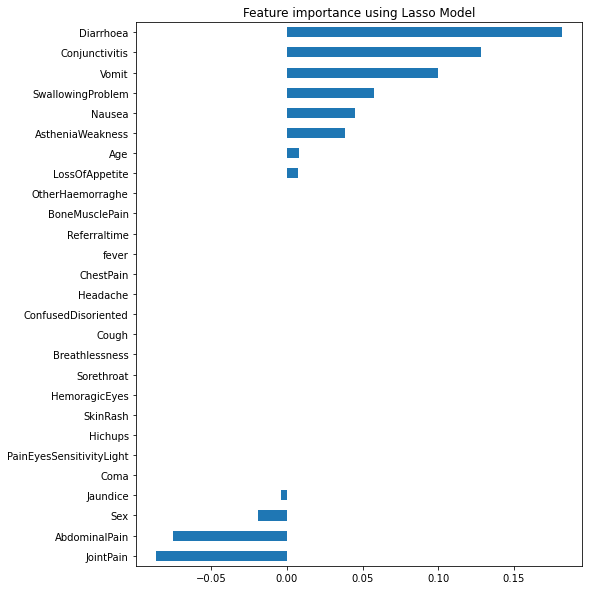

In [331]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()

# PCA

In [538]:
from sklearn.decomposition import PCA
k = 2 # Number of components
pca = PCA(n_components = k)
X_new = pca.fit_transform(X)
y_new = y.copy()


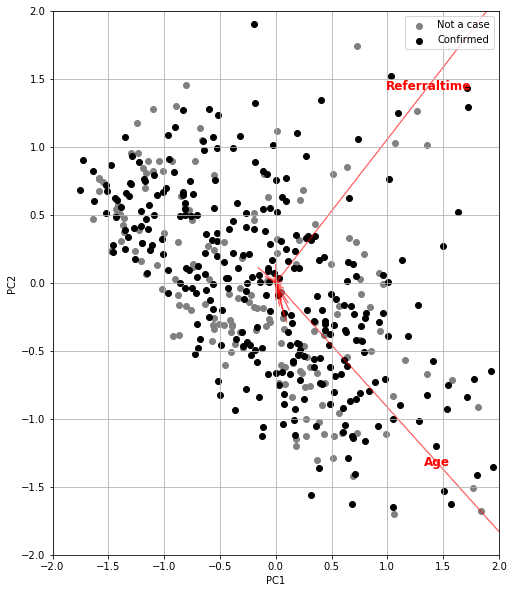

In [539]:
def myplot(X_new,y_new,coeff,labels=None):
    xs = X_new[:,0]
    ys = X_new[:,1]
    n = coeff.shape[0]
    cdict = {0: 'gray', 1: 'black'}
    ldict = {0: 'Not a case', 1: 'Confirmed'}
    fig, ax = plt.subplots()
    for g in np.unique(y_new):
        ix = np.where(y_new == g)
        ax.scatter(xs[ix], ys[ix], c = cdict[g], label = ldict[g])
    for i in range(n):
        factor_ = 2.8
        plt.arrow(0, 0, coeff[i,0]*factor_, coeff[i,1]*factor_,color = 'r',alpha = 0.5)
        if labels is None and np.linalg.norm([coeff[i,0], coeff[i,1]])>0.9:
            plt.text(coeff[i,0]* 2, coeff[i,1] * 2, str(X.columns[i]), color = 'red', ha = 'center', va = 'center', fontsize=12, weight='bold')
    
    ax.legend()
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    plt.show()
    
#Call the function. Use only the 2 PCs.
myplot(X_new, y_new, np.transpose(pca.components_[0:2, :]))


In [540]:
X_drop = X.drop(columns=['Sex', 'Age', 'Referraltime'])

# apply PCA 
k = 2
pca = PCA(n_components = k)
X_new = pca.fit_transform(X_drop)
y_new = y.copy()



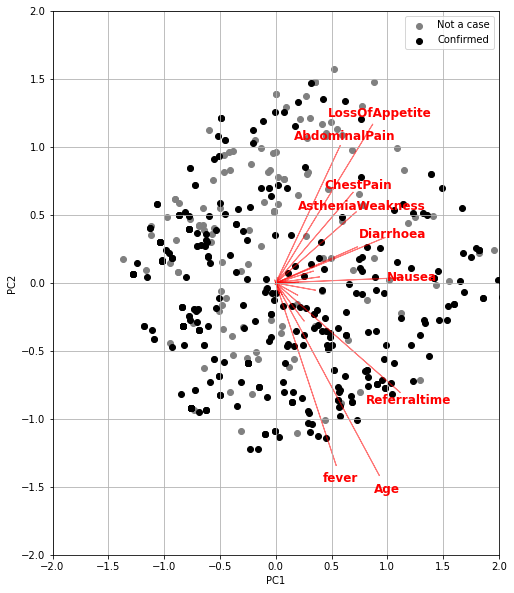

In [541]:
def myplot(X_new,y_new,coeff,labels=None):
    xs = X_new[:,0]
    ys = X_new[:,1]
    n = coeff.shape[0]
    cdict = {0: 'gray', 1: 'black'}
    ldict = {0: 'Not a case', 1: 'Confirmed'}
    fig, ax = plt.subplots()
    for g in np.unique(y_new):
        ix = np.where(y_new == g)
        ax.scatter(xs[ix], ys[ix], c = cdict[g], label = ldict[g])
    for i in range(n):
        factor_ = 2.8
        plt.arrow(0, 0, coeff[i,0]*factor_, coeff[i,1]*factor_,color = 'r',alpha = 0.5)
        if labels is None and np.linalg.norm([coeff[i,0], coeff[i,1]])>0.3:
            plt.text(coeff[i,0]* 3, coeff[i,1] * 3, str(X.columns[i]), color = 'red', ha = 'center', va = 'center', fontsize=12, weight='bold')
    
    ax.legend()
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    plt.show()
    
#Call the function. Use only the 2 PCs.
myplot(X_new, y_new, np.transpose(pca.components_[0:2, :]))


# Decision Trees
We did a few trees of varying depth. The problem is overfitting, which is fought with random forests. 

In [542]:
from sklearn.model_selection import train_test_split
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 123)


In [543]:
# What happens when you only can ask one question ?
clf1q = tree.DecisionTreeClassifier(max_depth=1)
clf1q = clf1q.fit(X_train, y_train)

y_pred = clf1q.predict(X_test)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Macro F1 score: ",f1_score(y_test, y_pred, average='macro'))
print("Micro F1 score: ",f1_score(y_test, y_pred, average='micro'))



Accuracy:  0.5416666666666666
Macro F1 score:  0.5372930866601753
Micro F1 score:  0.5416666666666666


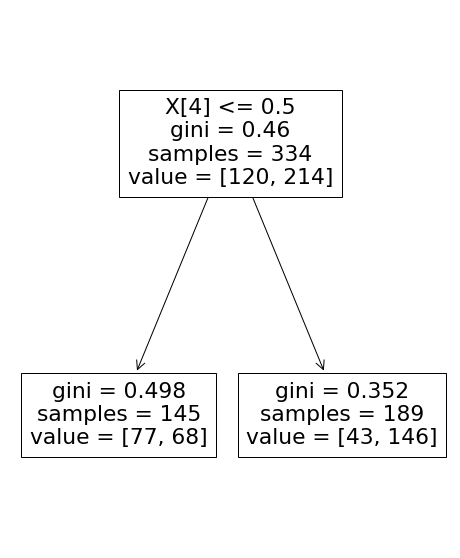

In [544]:
tree.plot_tree(clf1q)
fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(20, 15)
fig.savefig('tree_1_question.png')
plt.show()


In [545]:
import graphviz
dot_data_1q = tree.export_graphviz(clf1q, 
                                out_file=None, 
                                feature_names=X.columns,
                                rounded=True)
graph_1q = graphviz.Source(dot_data_1q)
graph_1q.render("Decision_tree_1_q")


'Decision_tree_1_q.pdf'

In [546]:
# What happens when you only can ask two question ?
clf2q = tree.DecisionTreeClassifier(max_depth=2)
clf2q = clf2q.fit(X_train, y_train)

y_pred = clf2q.predict(X_test)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Macro F1 score: ",f1_score(y_test, y_pred, average='macro'))
print("Micro F1 score: ",f1_score(y_test, y_pred, average='micro'))


Accuracy:  0.625
Macro F1 score:  0.5173783515392254
Micro F1 score:  0.625


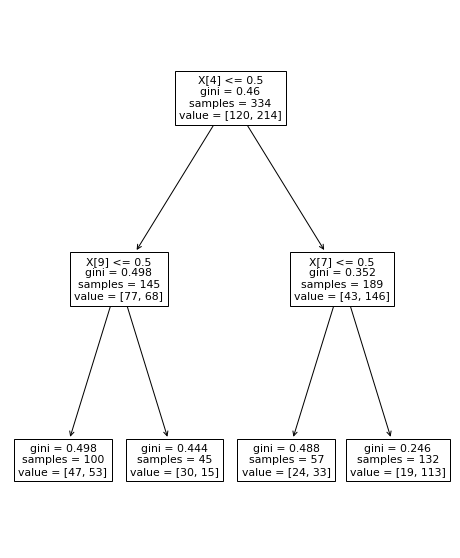

In [547]:

tree.plot_tree(clf2q)
fig = matplotlib.pyplot.gcf()
fig.savefig('tree_2_question.png')
plt.show()


In [548]:
dot_data_2q = tree.export_graphviz(clf2q, 
                                out_file=None, 
                                feature_names=X.columns,
                                class_names=['Not a case', 'Confirmed'],
                                rounded=True)
graph_2q = graphviz.Source(dot_data_2q)
graph_2q.render("Decision_tree_2_q")


'Decision_tree_2_q.pdf'

In [549]:
# Now with ten questions 
clf10q = tree.DecisionTreeClassifier(max_depth=10)
clf10q = clf10q.fit(X_train, y_train)

y_pred = clf10q.predict(X_test)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Macro F1 score: ",f1_score(y_test, y_pred, average='macro'))
print("Micro F1 score: ",f1_score(y_test, y_pred, average='micro'))


Accuracy:  0.6111111111111112
Macro F1 score:  0.5881511746680286
Micro F1 score:  0.6111111111111112


In [550]:
dot_data_10q = tree.export_graphviz(clf10q, 
                                out_file=None, 
                                feature_names=X.columns,
                                class_names=['Not a case', 'Confirmed'],
                                rounded=True)
graph_10q = graphviz.Source(dot_data_10q)
graph_10q.render("Decision_tree_10_q")


'Decision_tree_10_q.pdf'

Nice and all, but we have massive overfitting. Need to use a different technique; let's go with random forests

# Random Forest

In [567]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

# What happens when you only can ask five question ?
clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state = 123)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Macro F1 score: ",f1_score(y_test, y_pred, average='macro'))
print("Micro F1 score: ",f1_score(y_test, y_pred, average='micro'))




Accuracy:  0.6736111111111112
Macro F1 score:  0.6416582834754063
Micro F1 score:  0.6736111111111112


In [568]:
from sklearn.model_selection import GridSearchCV
param_test = {
    'n_estimators':[i for i in range(5, 20)],
    'max_depth':[i for i in range(3, 15)],
    'min_samples_split':[i for i in range(2, 5)]
}
clforest = RandomForestClassifier(random_state = 123)


In [569]:
gsearch = GridSearchCV(
    estimator= clforest,
    param_grid= param_test,
    scoring='roc_auc',
    n_jobs=4,
    iid=False,
    cv=5
)
gsearch.fit(X_train, y_train)


/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             iid=False, n_jobs=4,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                          16, 17, 18, 19]},
             scoring='roc_auc')

In [570]:

print(gsearch.best_params_)
print(gsearch.best_score_)


{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 9}
0.7153469915097822


In [564]:
# Create it just to see
clf_best = RandomForestClassifier(n_estimators=9, max_depth=5, min_samples_split=2)

clf_best = clf_best.fit(X_train, y_train)

y_pred = clf_best.predict(X_test)
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Accuracy under curve: ", roc_auc_score(y_test, y_pred))
print("Macro F1 score: ",f1_score(y_test, y_pred, average='macro'))
print("Micro F1 score: ",f1_score(y_test, y_pred, average='micro'))


Accuracy:  0.6458333333333334
Accuracy under curve:  0.6092951991828397
Macro F1 score:  0.6111611161116112
Micro F1 score:  0.6458333333333334


In [565]:

dot_data_forest =export_graphviz(
    clf_best.estimators_[0],
    out_file=None,
    feature_names=X.columns,
    class_names=['Not a case', 'Confirmed'],
    label='root',
    filled=True,
    rounded=True,
    impurity=False,
    proportion=True
)
graph_forest = graphviz.Source(dot_data_forest)
graph_forest.render("Decision_forest_0")


'Decision_forest_0.pdf'

In [566]:
dot_data_forest =export_graphviz(
    clf_best.estimators_[1],
    out_file=None,
    feature_names=X.columns,
    class_names=['Not a case', 'Confirmed'],
    label='root',
    filled=True,
    rounded=True,
    impurity=False,
    proportion=True
)
graph_forest = graphviz.Source(dot_data_forest)
graph_forest.render("Decision_forest_1")

dot_data_forest =export_graphviz(
    clf_best.estimators_[2],
    out_file=None,
    feature_names=X.columns,
    class_names=['Not a case', 'Confirmed'],
    label='root',
    filled=True,
    rounded=True,
    impurity=False,
    proportion=True
)
graph_forest = graphviz.Source(dot_data_forest)
graph_forest.render("Decision_forest_2")

dot_data_forest =export_graphviz(
    clf_best.estimators_[3],
    out_file=None,
    feature_names=X.columns,
    class_names=['Not a case', 'Confirmed'],
    label='root',
    filled=True,
    rounded=True,
    impurity=False,
    proportion=True
)
graph_forest = graphviz.Source(dot_data_forest)
graph_forest.render("Decision_forest_3")

dot_data_forest =export_graphviz(
    clf_best.estimators_[4],
    out_file=None,
    feature_names=X.columns,
    class_names=['Not a case', 'Confirmed'],
    label='root',
    filled=True,
    rounded=True,
    impurity=False,
    proportion=True
)
graph_forest = graphviz.Source(dot_data_forest)
graph_forest.render("Decision_forest_4")

dot_data_forest =export_graphviz(
    clf_best.estimators_[5],
    out_file=None,
    feature_names=X.columns,
    class_names=['Not a case', 'Confirmed'],
    label='root',
    filled=True,
    rounded=True,
    impurity=False,
    proportion=True
)
graph_forest = graphviz.Source(dot_data_forest)
graph_forest.render("Decision_forest_5")

dot_data_forest =export_graphviz(
    clf_best.estimators_[6],
    out_file=None,
    feature_names=X.columns,
    class_names=['Not a case', 'Confirmed'],
    label='root',
    filled=True,
    rounded=True,
    impurity=False,
    proportion=True
)
graph_forest = graphviz.Source(dot_data_forest)
graph_forest.render("Decision_forest_6")

dot_data_forest =export_graphviz(
    clf_best.estimators_[7],
    out_file=None,
    feature_names=X.columns,
    class_names=['Not a case', 'Confirmed'],
    label='root',
    filled=True,
    rounded=True,
    impurity=False,
    proportion=True
)
graph_forest = graphviz.Source(dot_data_forest)
graph_forest.render("Decision_forest_7")

dot_data_forest =export_graphviz(
    clf_best.estimators_[8],
    out_file=None,
    feature_names=X.columns,
    class_names=['Not a case', 'Confirmed'],
    label='root',
    filled=True,
    rounded=True,
    impurity=False,
    proportion=True
)
graph_forest = graphviz.Source(dot_data_forest)
graph_forest.render("Decision_forest_8")




'Decision_forest_8.pdf'

## XGBoost 
We use the X and y from above, they contain sex,age,referal time and symptoms 

__Import libraries__

In [333]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib.pylab import rcParams
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance


##### __Hyperparameters__
__BOOSTER PARAMETER__
- _learning rate_:         eta = [[0,1]] (Use CV)
- _min_child_weigt_:   (determines sum of weights of all weights required in a child) Controls overfitting, high values prevent models to learn from highly specific samples
(Use CV)
- _max_depth_: determines depth of tree [3-10] (Use CV)
- _subsample_: % of samples used per tree, low value may lead to underfitting [0.5-1]
- _colsample_bytree_: % features used per tree, high value, then overfitting [0.5-1]


__Learning Task Parameters__
- _objective_: (binary:logistic )logistic regression for binary classification, returns predicted probability (not class)
- _eval_metric_= "error" Binary classification 0.5 threshold 
- _n_estimators_: number of trees to built




__To penalize__
- _gamma_: The larger gamma is, the more conservative the algorithm will be. (loss required to split)
- _alpha_: L1 regularization
- _lambda_: L2 reg, smoother than L1


In [449]:
def modelfit(alg,x_train, y_train, x_test, y_test,useTrainCV=True, cv_folds=5, early_stopping_rounds=100):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(x_train, y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds,show_stdv=False)
        alg.set_params(n_estimators=cvresult.shape[0])
        print(cvresult.shape[0])
    
    #Fit the algorithm on the data
    eval_set = [(x_train, y_train), (x_test, y_test)]
    alg.fit(x_train, y_train,eval_metric='error', eval_set=eval_set, verbose=False)

        
    #Predict training set:
    dtrain_predictions = alg.predict(x_train)
    dtrain_predprob = alg.predict_proba(x_train)[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("F1 accuracy score (train): ",metrics.f1_score(y_train,model.predict(x_train)))
    print ("Accuracy (train): %.3f" %metrics.accuracy_score(y_train, dtrain_predictions))
    print("Accuracy (test): %.3f" %metrics.accuracy_score(y_test, alg.predict(x_test)))
    print("F1 accuracy score (test): ",metrics.f1_score(y_test,model.predict(x_test)))
    print("AUC Accuracy (train): %f"%metrics.roc_auc_score(y_train, dtrain_predprob))
    print("AUC Accuracy (test): %f"%metrics.roc_auc_score(y_test, alg.predict_proba(x_test)[:,1]))
 
    # Plot the important features
    xgb.plot_importance(alg)

    
# Code inspired from : https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

__Splitting__


In [491]:
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                      test_size = 0.3, random_state = 123) 

## Let's try one by one paramter tuning

General Approach for Parameter Tuning

We will use an approach similar to that of GBM here. The various steps to be performed are:

    Choose a relatively high learning rate. Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems. Determine the optimum number of trees for this learning rate. XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.
    
    Tune tree-specific parameters ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.
    
    Tune regularization parameters (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.
    Lower the learning rate and decide the optimal parameters .


In [492]:
print("This gives an idea of the scale_pos_weight value  ",sum(y_train==1)/sum(y_train==0))

This gives an idea of the scale_pos_weight value   1.7833333333333334


In [493]:
#############
# tuning n_estimators (number of trees)
#############

model_tune = xgb.XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,
                         gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',
                             nthread=4, seed=123, reg_lambda = 0,scale_pos_weight = 1.78)



param_test1 = {'n_estimators':range(9,20,5)
}
gsearch1 = GridSearchCV(estimator = model_tune, 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(x_train,y_train)
gsearch1.best_params_, gsearch1.best_score_


/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'n_estimators': 19}, 0.6359726836471022)

In [494]:
# Set parameters
model_tune.set_params(n_estimators=gsearch1.best_params_['n_estimators'])

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=19, n_jobs=None, nthread=4, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=0,
              scale_pos_weight=1.78, seed=123, subsample=0.8, tree_method=None,
              validate_parameters=None, verbosity=None)

#### GridSearchCV

Instead of looking at one parameter at a time, let us use GridSearch

In [495]:
################
# Tune max_depth, et min_child weight
# n_estimators = 19, based on CV above
################


param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = 
                        model_tune, 
                                param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(x_train,y_train)
gsearch1.best_params_, gsearch1.best_score_


/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'max_depth': 3, 'min_child_weight': 5}, 0.6808831672203766)

##### We try a bit more precisely again with max_depth and min_child_weight

optimal was 3 for depth and 5 for min child weight

In [496]:
param_test2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[4,5,6,7]
}
gsearch2 = GridSearchCV(estimator = model_tune, 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(x_train,y_train)
gsearch2.best_params_, gsearch2.best_score_



/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'max_depth': 2, 'min_child_weight': 4}, 0.7133720930232558)

In [497]:
# New optimal, let's set those instead 
model_tune.set_params(max_depth=gsearch2.best_params_['max_depth'],min_child_weight=gsearch2.best_params_['min_child_weight'])

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=2,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=19, n_jobs=None, nthread=4, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=0,
              scale_pos_weight=1.78, seed=123, subsample=0.8, tree_method=None,
              validate_parameters=None, verbosity=None)

In [498]:
################
# Tune gamma
# n_estimators = 19, based on CV above
# max_depth = 2, based on CV above
# min_child_weight = 4, based on CV above
################


param_test3 = {
 'gamma':[i/10.0 for i in range(0,3)]
}
gsearch3 = GridSearchCV(estimator = model_tune, 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(x_train,y_train)
gsearch3.best_params_, gsearch3.best_score_


/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'gamma': 0.0}, 0.7133720930232558)

In [499]:
# Set gamma parameter
model_tune.set_params(gamma=gsearch3.best_params_['gamma'])

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8, gamma=0.0,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=2,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=19, n_jobs=None, nthread=4, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=0,
              scale_pos_weight=1.78, seed=123, subsample=0.8, tree_method=None,
              validate_parameters=None, verbosity=None)

19

Model Report
F1 accuracy score (train):  0.7911111111111112
Accuracy (train): 0.641
Accuracy (test): 0.618
F1 accuracy score (test):  0.7253886010362695
AUC Accuracy (train): 0.780238
AUC Accuracy (test): 0.599387


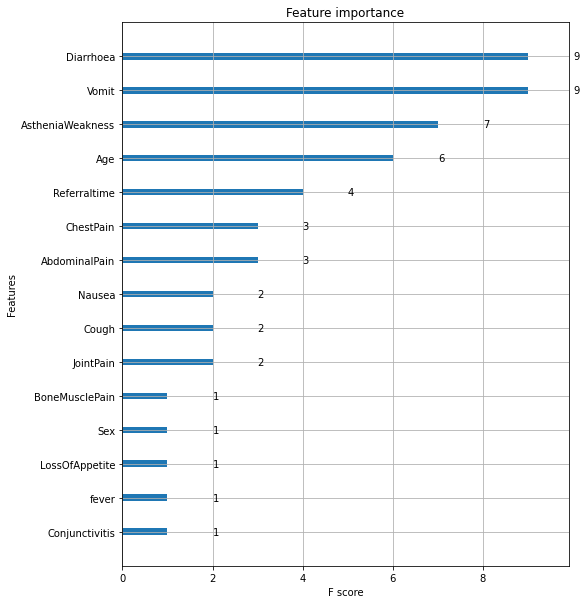

In [512]:
# Let's have  a look at the model again 
modelfit(model_tune, x_train, y_train, x_test, y_test)


In [513]:
################
# Tune subsample (% of sample used in trees) and colsample_bytree (% features used by trees)
# n_estimators = 19, based on CV above
# max_depth = 2, based on CV above
# min_child_weight = 4, based on CV above
# gamma = 0, CV above
################

param_test4 = {
 'subsample':[i/10.0 for i in range(5,10)],
 'colsample_bytree':[i/10.0 for i in range(5,10)]
}
gsearch4 = GridSearchCV(estimator =model_tune, 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(x_train,y_train)
gsearch4.best_params_, gsearch4.best_score_



/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'colsample_bytree': 0.9, 'subsample': 0.5}, 0.7272771317829456)

In [514]:
# Let's try smaller values around the ones found
model_tune.set_params(subsample=gsearch4.best_params_['subsample'],colsample_bytree=gsearch4.best_params_['colsample_bytree'])


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=19, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=123, reg_alpha=0, reg_lambda=5,
              scale_pos_weight=1.78, seed=123, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [515]:
param_test5 = {
 'subsample':[i/100.0 for i in range(70,80,5)],
 'colsample_bytree':[i/100.0 for i in range(65,80,5)]
}
gsearch5 = GridSearchCV(estimator = model_tune, 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(x_train,y_train)
gsearch5.best_params_, gsearch5.best_score_

# It changed a little, we pick these instead

/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'colsample_bytree': 0.65, 'subsample': 0.75}, 0.7197443706164636)

In [516]:
# Set new parameters "optimal parameters"
model_tune.set_params(subsample=gsearch5.best_params_['subsample'],colsample_bytree=gsearch5.best_params_['colsample_bytree'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.65, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=19, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=123, reg_alpha=0, reg_lambda=5,
              scale_pos_weight=1.78, seed=123, subsample=0.75,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [517]:
################
# reg_lambda: L2 reg tuning
# n_estimators = 19, based on CV above
# max_depth = 2, based on CV above
# min_child_weight = 6, based on CV above
# gamma = 0, CV above
# colsample_bytree = 0.65, CV above
# subsample = 0.8, CV above
################


param_test6 = {
 'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = model_tune, 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch6.fit(x_train,y_train)
gsearch6.best_params_, gsearch6.best_score_

/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'reg_lambda': 1}, 0.7168950719822813)

In [518]:
# Let's try values closer to 1 

param_test7 = {
 'reg_lambda': np.arange(0,7,1)
}
gsearch7 = GridSearchCV(estimator = model_tune, 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch7.fit(x_train,y_train)
gsearch7.best_params_, gsearch7.best_score_


/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'reg_lambda': 5}, 0.7197443706164636)

In [519]:
model_tune.set_params(reg_lambda=gsearch7.best_params_['reg_lambda'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.65, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=19, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=123, reg_alpha=0, reg_lambda=5,
              scale_pos_weight=1.78, seed=123, subsample=0.75,
              tree_method='exact', validate_parameters=1, verbosity=None)

19

Model Report
F1 accuracy score (train):  0.7911111111111112
Accuracy (train): 0.641
Accuracy (test): 0.618
F1 accuracy score (test):  0.7253886010362695
AUC Accuracy (train): 0.780238
AUC Accuracy (test): 0.599387


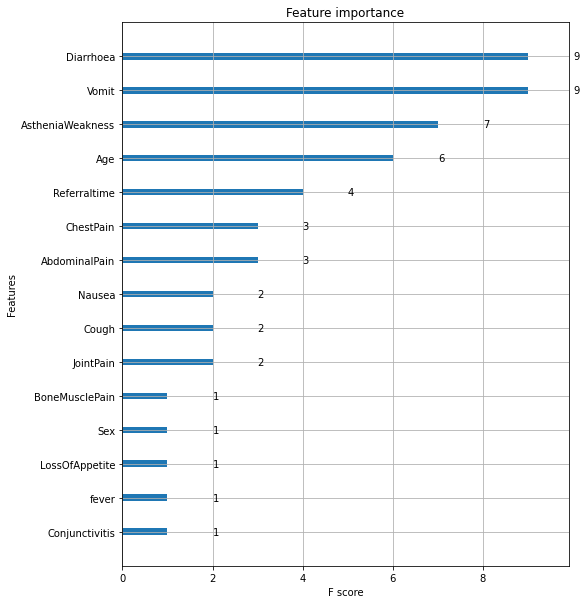

In [520]:
modelfit(model_tune, x_train, y_train, x_test, y_test)


In [531]:
# Last step is the learning rate

################
# 
# n_estimators = 19, based on CV above
# max_depth = 2, based on CV above
# min_child_weight = 6, based on CV above
# gamma = 0, CV above
# colsample_bytree = 0.65, CV above
# subsample = 0.5, CV above
# reg_lambda (L2 reg) = 5, CV above
################


param_test8 = {
 'learning_rate': np.arange(0.01,0.3,0.01)
}
gsearch8 = GridSearchCV(estimator = model_tune, 
 param_grid = param_test8, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch8.fit(x_train,y_train)
gsearch8.best_params_, gsearch8.best_score_


/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'learning_rate': 0.01}, 0.7258282576596531)

19

Model Report
F1 accuracy score (train):  0.7911111111111112
Accuracy (train): 0.641
Accuracy (test): 0.618
F1 accuracy score (test):  0.7253886010362695
AUC Accuracy (train): 0.762889
AUC Accuracy (test): 0.602247


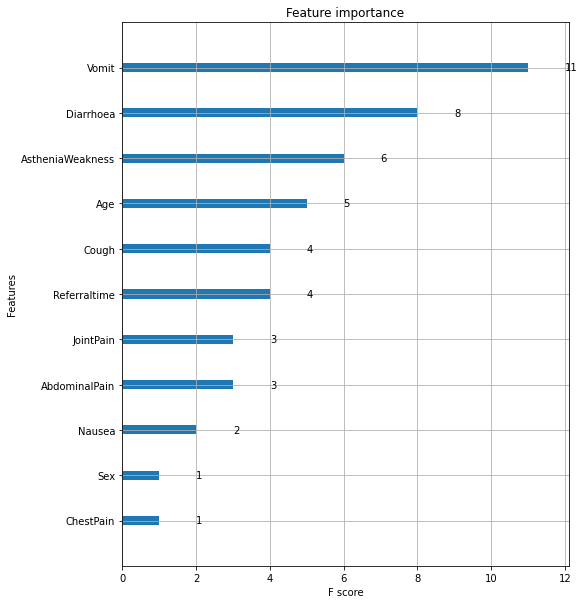

In [532]:
# Set the new learning rate (final parameter)
model_tune.set_params(learning_rate=gsearch8.best_params_['learning_rate'])

# Final model
modelfit(model_tune, x_train, y_train, x_test, y_test)


#### Instead of cross validating, one or two parameters at a time, let's do many 

Good news: Thanks to the tuning above, we get a better idea of the ranges (the results should be quite similar)
butthe method below is able to do everything at the same time, we thus expect a better result (with the given ranges)

In [535]:


param_test = {'learning_rate': np.arange(0.01,0.3,0.1), 'n_estimators':np.arange(9,20,5),'max_depth':[2,3,4], 'gamma': [i/10.0 for i in range(0,3)],
               'min_child_weight':np.arange(5,8,1),'subsample': [i/100.0 for i in range(70,80,5)], 'colsample_bytree': [i/100.0 for i in range(65,80,5)], 
                  'reg_lambda':np.arange(0,7,1)}

gsearch = GridSearchCV(estimator = 
                        XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,
                         gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',
                             nthread=4, seed=123, reg_lambda = 0,scale_pos_weight = 1.78), 
                                param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5,verbose = False)
gsearch.fit(x_train,y_train)
gsearch.best_params_, gsearch.best_score_



/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'colsample_bytree': 0.65,
  'gamma': 0.2,
  'learning_rate': 0.01,
  'max_depth': 2,
  'min_child_weight': 5,
  'n_estimators': 19,
  'reg_lambda': 6,
  'subsample': 0.7},
 0.7300825950535252)

14

Model Report
F1 accuracy score (train):  0.7911111111111112
Accuracy (train): 0.647
Accuracy (test): 0.625
F1 accuracy score (test):  0.7253886010362695
AUC Accuracy (train): 0.760202
AUC Accuracy (test): 0.629009


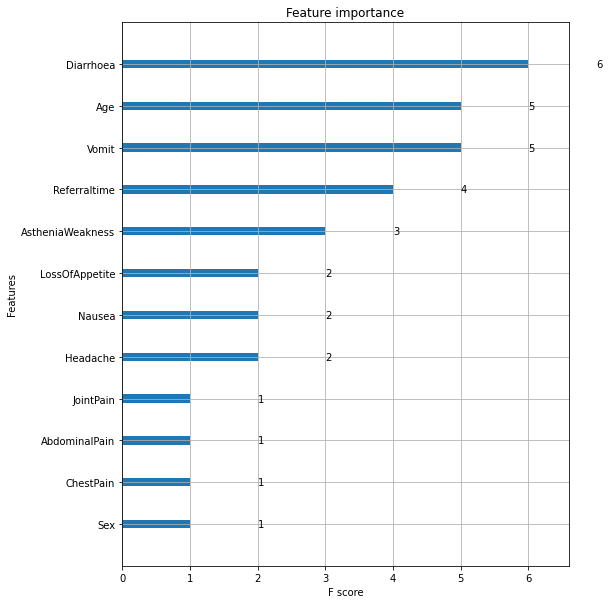

In [536]:
# Model with optimized set of parameters 
model_CV = XGBClassifier( learning_rate =0.11, n_estimators=14, max_depth=2,
                         min_child_weight=7, gamma=0.2, subsample=0.45, colsample_bytree=0.65,
                         objective= 'binary:logistic', nthread=4, scale_pos_weight=1.78, reg_lambda = 4,seed=123)

# Model report with CV
modelfit(model_CV, x_train, y_train, x_test, y_test)